**În această sarcină trebuie să folosești agoritmul DecisionTreeClassifier de la sklearn pentru a prezice daca salariul unei persoane este mai mare sau mai mic de 50K **

Valori unice ale tuturor caracteristicilor (pentru mai multe informații, consultați linkul de mai sus):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

Apropo, ai lucrat anterior cu acest set de date in lectia 3.

In [ ]:
import pandas as pd

In [ ]:
!mkdir data && curl -o data/adult.data.csv -LJO https://github.com/dianaartiom/machine_learning_with_python/raw/main/lesson03/notebooks/data/adult.data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 3436k  100 3436k    0     0  6398k      0 --:--:-- --:--:-- --:--:-- 30.2M


In [ ]:
data = pd.read_csv('data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Preproceseaza datele precum am invatat in lectiile anterioare. Vezi lectia asta pentru a-ti reimprospata memoria (sectiunea Observatie despre pregatirea datelor): https://colab.research.google.com/drive/1C0wQef4NFzaOT5vfdU0btdL-9rnnf0my?usp=sharing 


In [ ]:
# metodele tale de preprocesare aici:
data.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Separa setul in date -> X si label -> y (coloana *Target*):

In [ ]:
X = data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
dictt = {"<=50K": 0, ">50K": 1}
y = data.salary.map(dictt)

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

Imparte setul de date in: date de antrenare si date pentru test cu ajutorul functiei *train_test_split* din modulul *sklearn.model_selection*.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

Instantiaza modelul de *DecisionTreeClassifier* pe care-l importi din *sklearn.tree* si antreneaza-l pe setul de antrenare.
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(max_depth=4, random_state=0)

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("Accuracy in train: ", accuracy_score(y_train_pred, y_train))

y_test_pred = model.predict(X_test)
print("Accuracy in test: ", accuracy_score(y_test_pred, y_test))

Accuracy in train:  0.8189496314496314
Accuracy in test:  0.8162137263933671


Calculeaza acuratetea, precision si recall a prezicerilor vs. datele reale atat pe setul de train cat si pe setul de test. Cum sa faci asta iti poti aminti din tema pentru acasa a lectiei 6 (logistic regression). https://colab.research.google.com/drive/1lSj5sW02zurCH8HhoZX27tK7FcDIUCS2?usp=sharing

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision in train: ", precision_score(y_train_pred, y_train))
print("Precision in test: ", precision_score(y_test_pred, y_test))
print("Recall in train: ", recall_score(y_train_pred, y_train))
print("Rncall in test: ", recall_score(y_test_pred, y_test))

Precision in train:  0.2722337537921124
Precision in test:  0.2693282636248416
Recall in train:  0.9151905528717122
Rncall in test:  0.906183368869936


Foloseste metoda *plot_tree* din *tree* importat din *sklearn* pentru a vizualiza arborele de decizie.

[Text(0.5089285714285714, 0.9, 'X[3] <= 5119.0\ngini = 0.365\nsamples = 26048\nvalue = [19785, 6263]'),
 Text(0.2857142857142857, 0.7, 'X[2] <= 12.5\ngini = 0.325\nsamples = 24771\nvalue = [19720, 5051]'),
 Text(0.14285714285714285, 0.5, 'X[0] <= 33.5\ngini = 0.239\nsamples = 19017\nvalue = [16381, 2636]'),
 Text(0.07142857142857142, 0.3, 'X[0] <= 26.5\ngini = 0.092\nsamples = 8454\nvalue = [8044, 410]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.027\nsamples = 5012\nvalue = [4943, 69]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.179\nsamples = 3442\nvalue = [3101, 341]'),
 Text(0.21428571428571427, 0.3, 'X[4] <= 1820.5\ngini = 0.333\nsamples = 10563\nvalue = [8337, 2226]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.317\nsamples = 10251\nvalue = [8223, 2028]'),
 Text(0.25, 0.1, 'gini = 0.464\nsamples = 312\nvalue = [114, 198]'),
 Text(0.42857142857142855, 0.5, 'X[0] <= 29.5\ngini = 0.487\nsamples = 5754\nvalue = [3339, 2415]'),
 Text(0.35714285714285715, 0.3, 'X[0] <= 27.5\ngini = 0.21

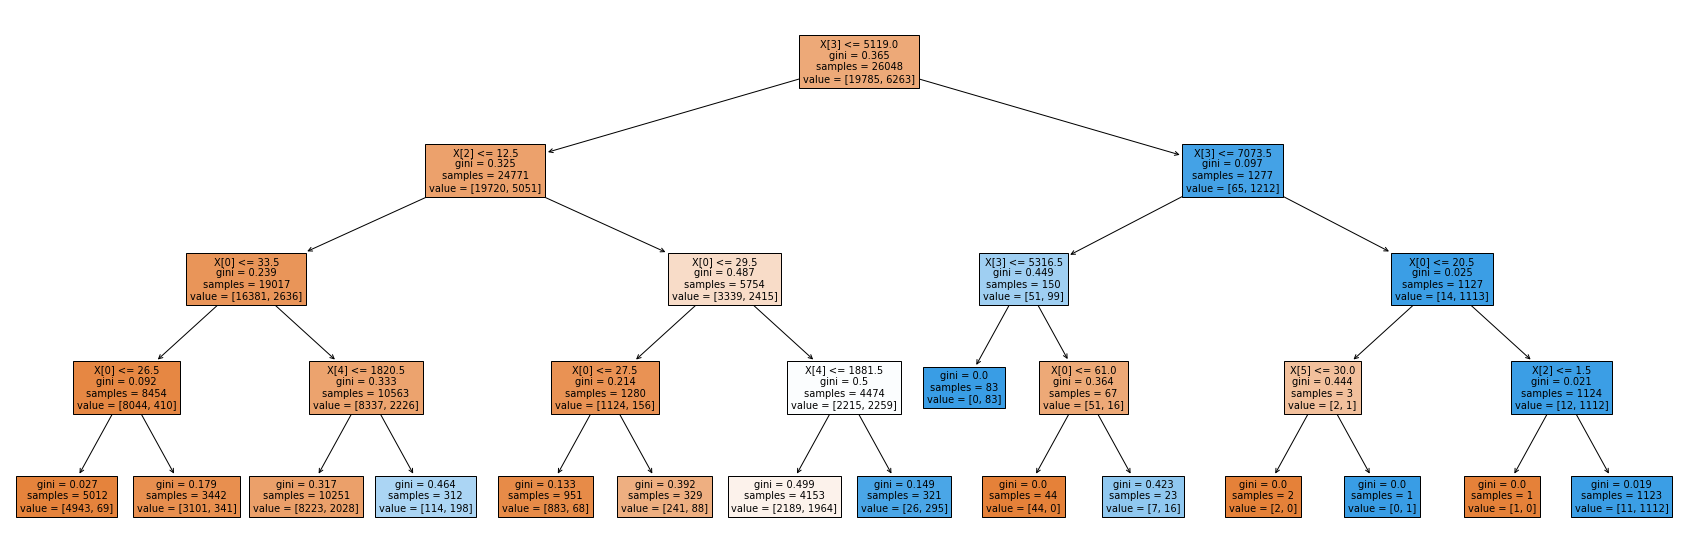

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))

tree.plot_tree(model, filled=True)

## Challenge: Incerca sa folosesti diferite combinatii pentru diferiti parametri de intrare pentru *DecisionTreeClassifier*.

Todo: citeste despre hyperparameter optimization cu grid search.